In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

In [2]:
# read data
df = pd.read_csv('C:/Users/User/Desktop/hotel_bookings.csv')

In [3]:
# display the first 5 rows of data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Shape of DataFrame
df.shape

(119390, 32)

In [5]:
# data infomation
df.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [6]:
# display data columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# display variables contain more than one missing (NaN) value
nan_feature=[feature for feature in df.columns if df[feature].isnull().sum()>1]
nan_feature

['children', 'country', 'agent', 'company']

In [8]:
# shoe the columns with missing 
df[nan_feature].head()

,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN


Categorical feature

In [9]:
# Display the columns with data type 'object'
cat_feature=[feature for feature in df.columns if df[feature].dtypes=='object']
cat_feature

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [10]:
# Iterate over each categorical feature and print the number of unique values
for feature in cat_feature:
    print(feature, len(df[feature].unique()))

hotel 2
arrival_date_month 12
meal 5
country 178
market_segment 8
distribution_channel 5
reserved_room_type 10
assigned_room_type 12
deposit_type 3
customer_type 4
reservation_status 3
reservation_status_date 926


Numerical feature

In [11]:
# Iterate over each numerical feature and print the number of unique values
num_feature=[feature for feature in df.columns if df[feature].dtypes!='object']
num_feature

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [12]:
# Print each feature and the number of unique values > 25
cont_num_feature=[feature for feature in num_feature if len(df[feature].unique())> 25]
for feature in cont_num_feature:
    print(feature,len(df[feature].unique()))

lead_time 479
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_week_nights 35
previous_bookings_not_canceled 73
agent 334
company 353
days_in_waiting_list 128
adr 8879


In [13]:
# Print each feature and the number of unique values < 25
disc_num_feature=[feature for feature in num_feature if len(df[feature].unique())<25]
for feature in disc_num_feature:
    print(feature,len(df[feature].unique()))

is_canceled 2
arrival_date_year 3
stays_in_weekend_nights 17
adults 14
children 6
babies 5
is_repeated_guest 2
previous_cancellations 15
booking_changes 21
required_car_parking_spaces 5
total_of_special_requests 6


In [14]:
#cont_num_feature is a list of continuous numerical feature names
df[cont_num_feature].head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,agent,company,days_in_waiting_list,adr
0,342,27,1,0,0,NaN,NaN,0,0.0
1,737,27,1,0,0,NaN,NaN,0,0.0
2,7,27,1,1,0,NaN,NaN,0,75.0
3,13,27,1,1,0,304.0,NaN,0,75.0
4,14,27,1,2,0,240.0,NaN,0,98.0


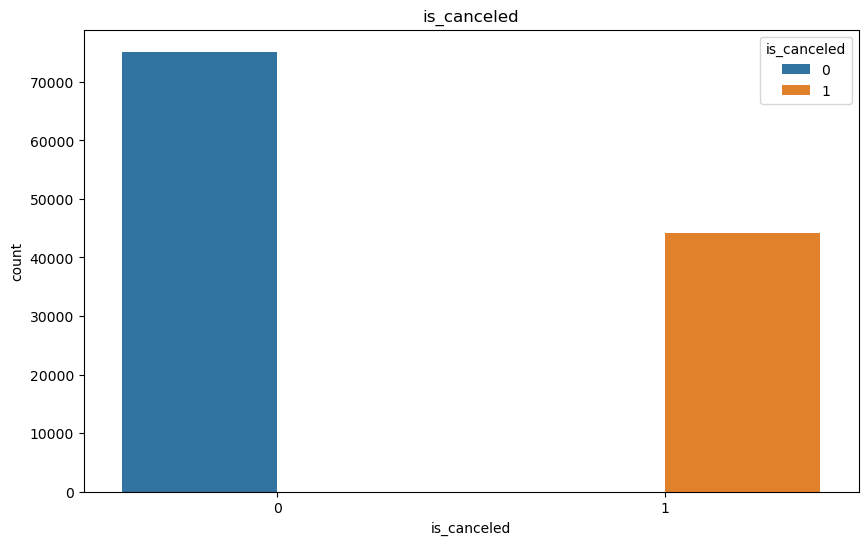

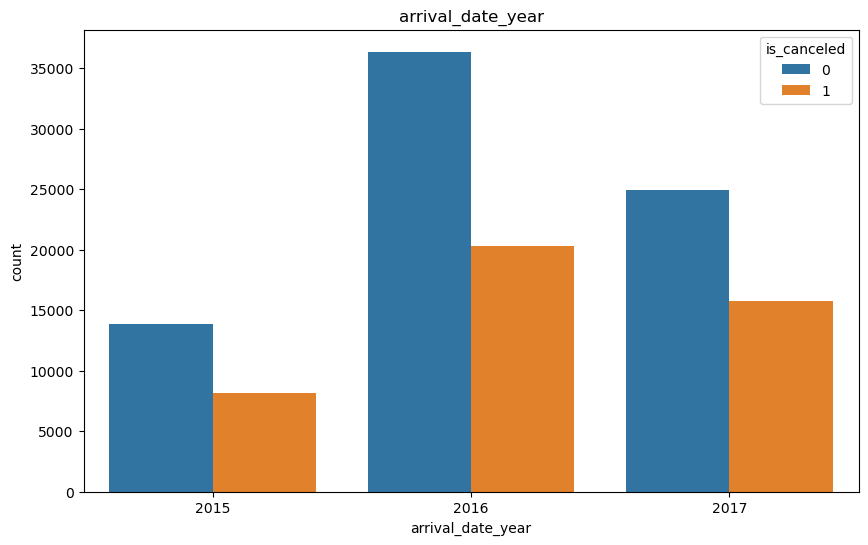

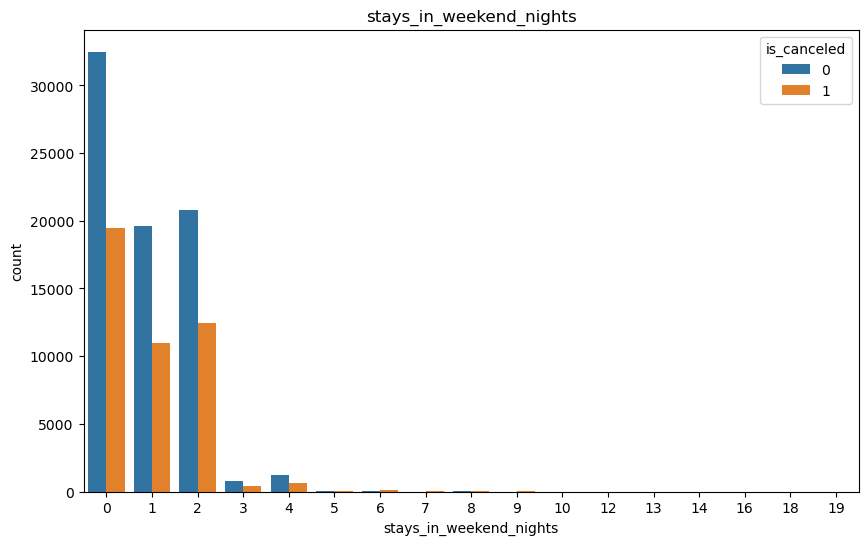

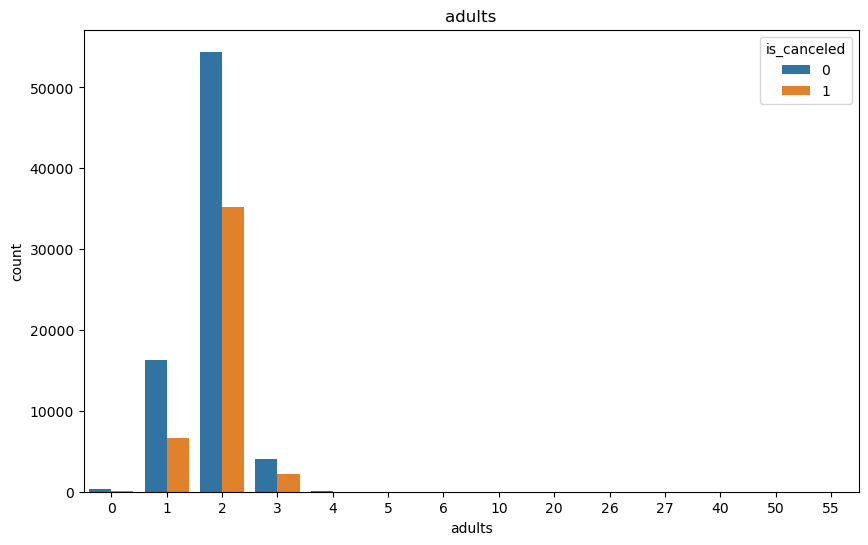

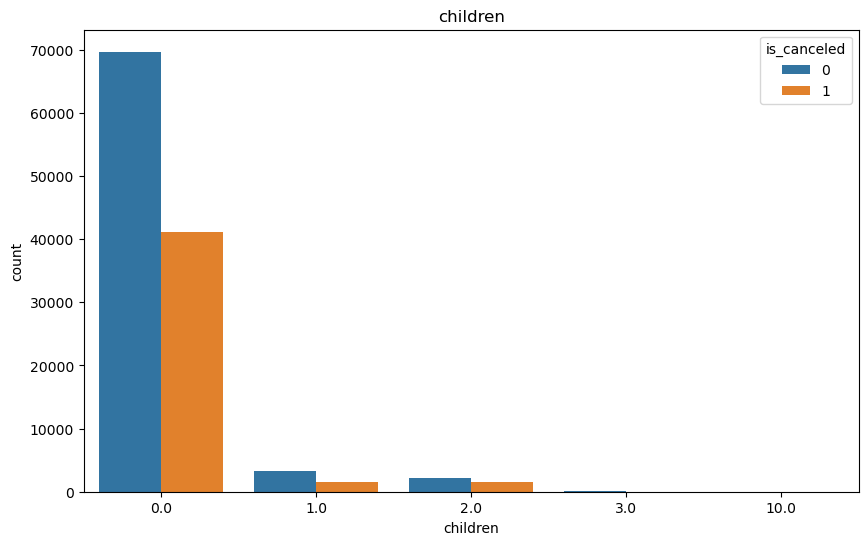

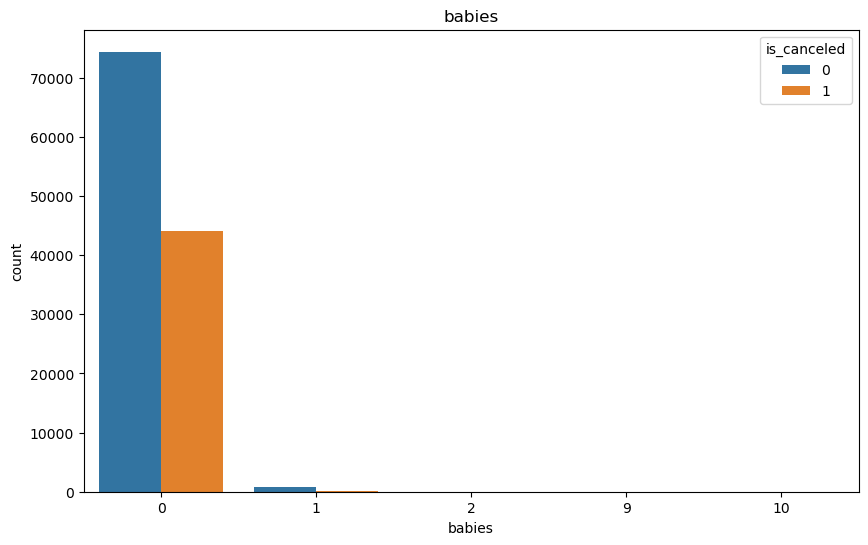

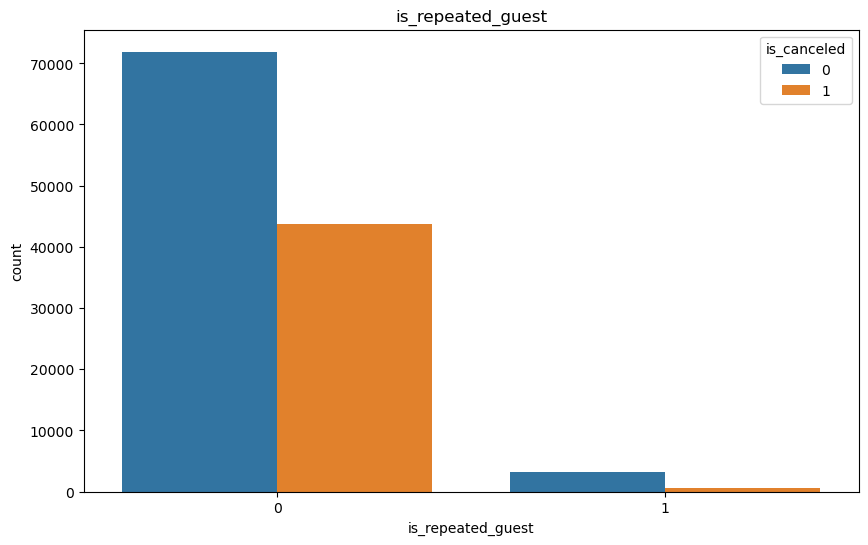

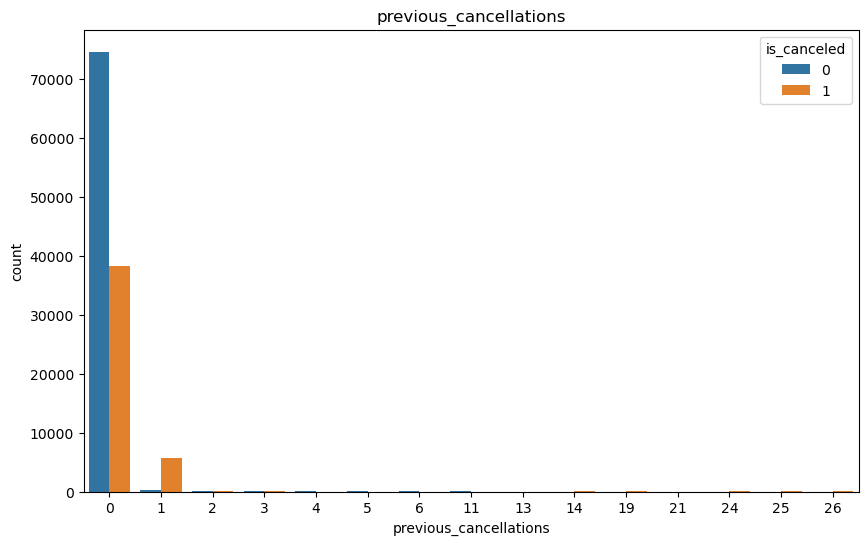

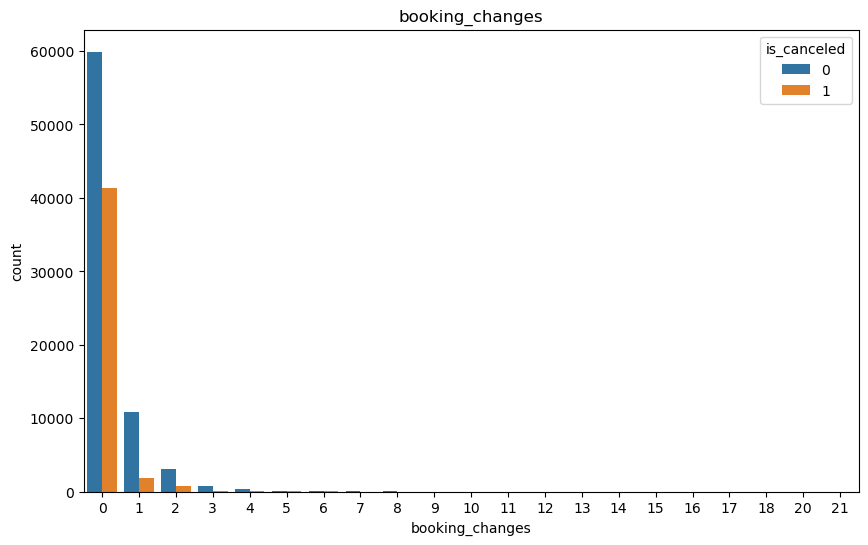

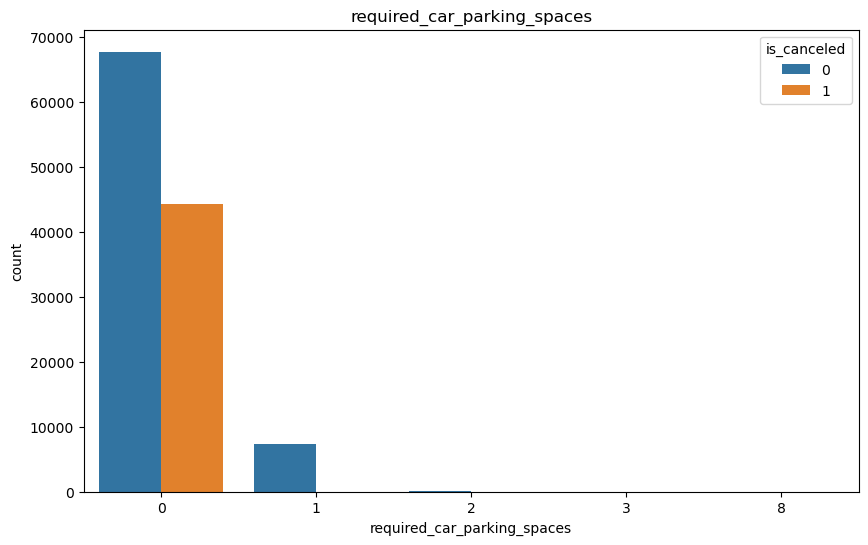

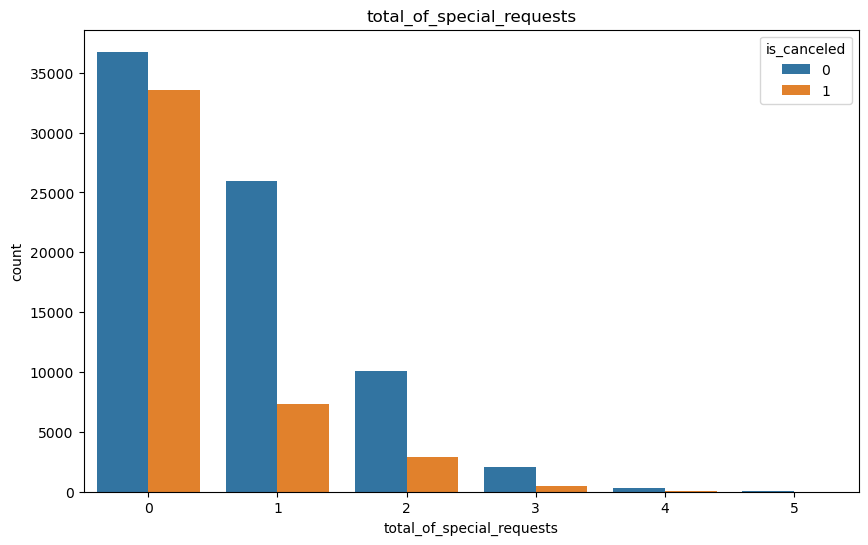

In [15]:
# disc_num_feature is a list of categorical or discrete numerical feature names
# Create countplots for each categorical or discrete numerical feature
for feature in disc_num_feature:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature], hue=df['is_canceled'])
    plt.title(feature)
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_28688\973919501.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature],kde=False,color='darkblue')


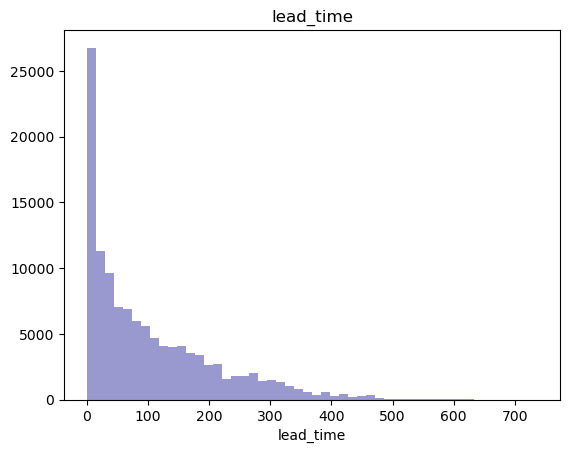

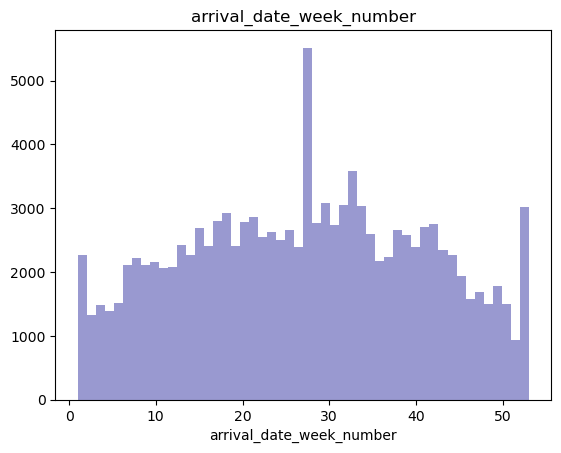

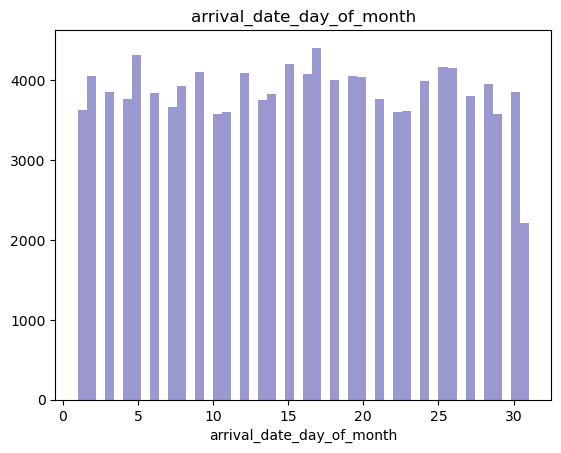

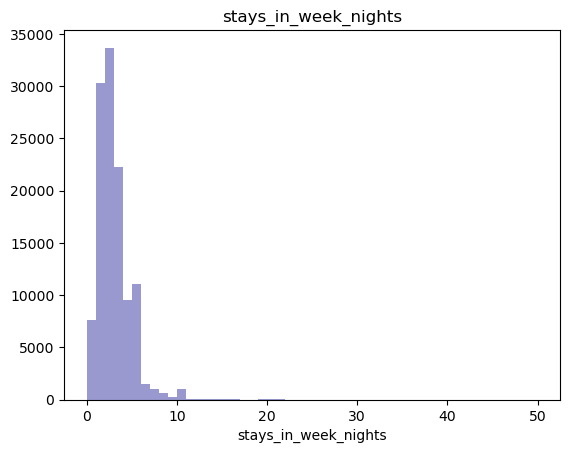

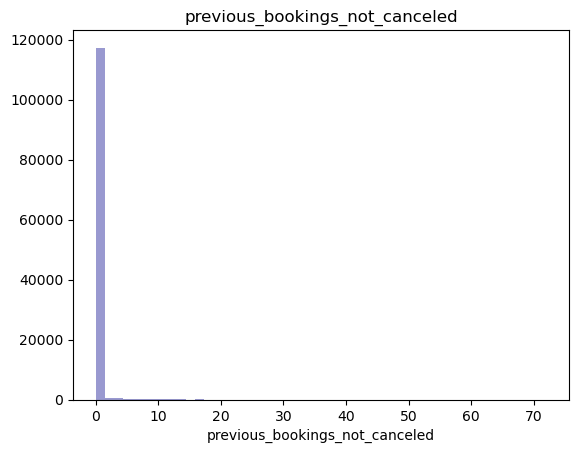

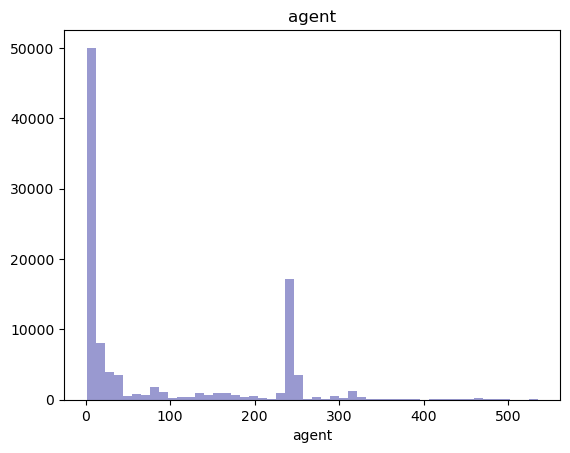

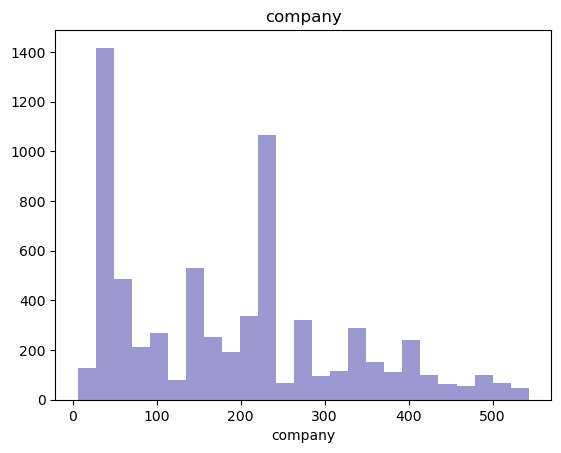

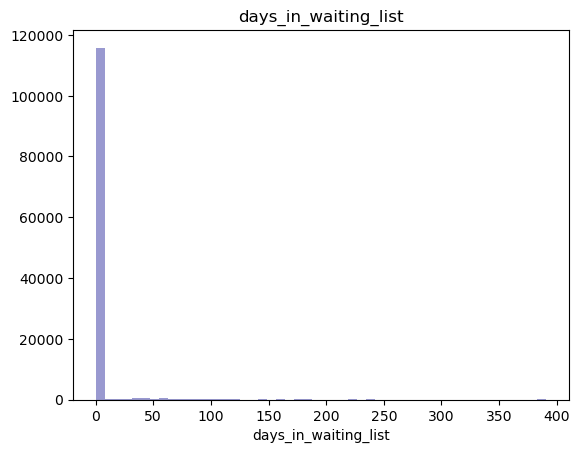

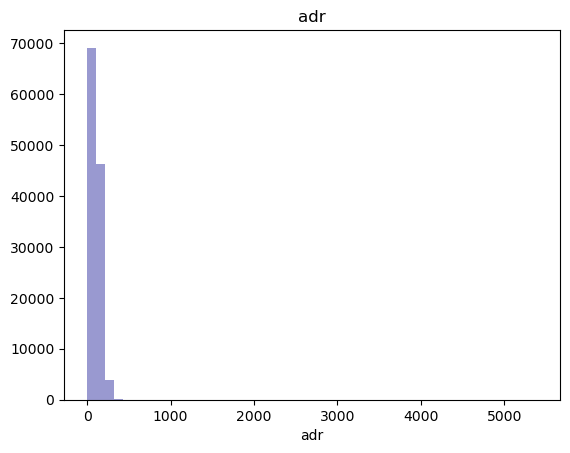

In [16]:
# cont_num_feature is a list of continuous numerical feature names
# Create histograms for each continuous numerical feature
for feature in cont_num_feature:
    sns.distplot(df[feature],kde=False,color='darkblue')
    plt.title(feature)
    plt.show()

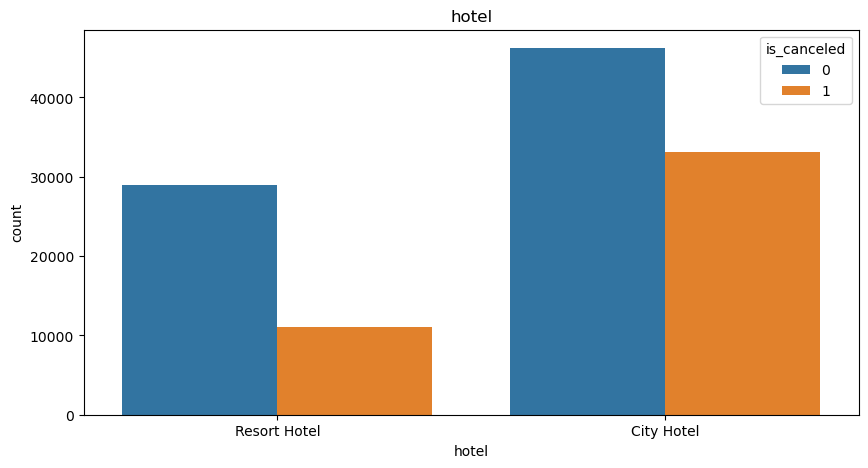

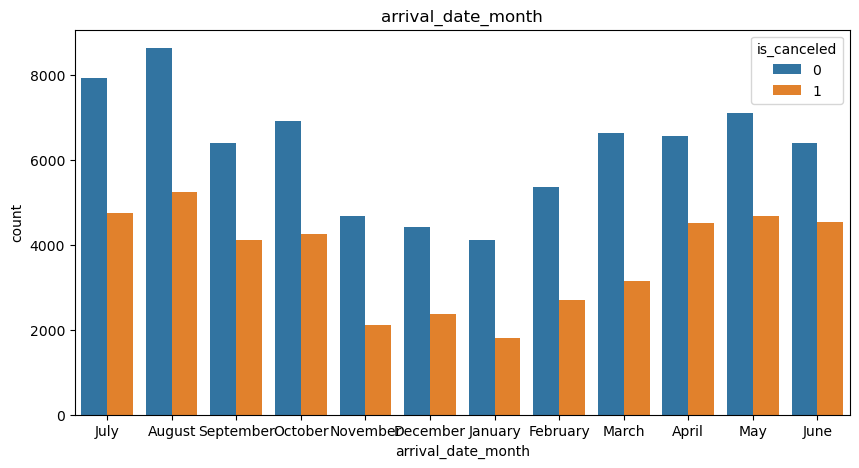

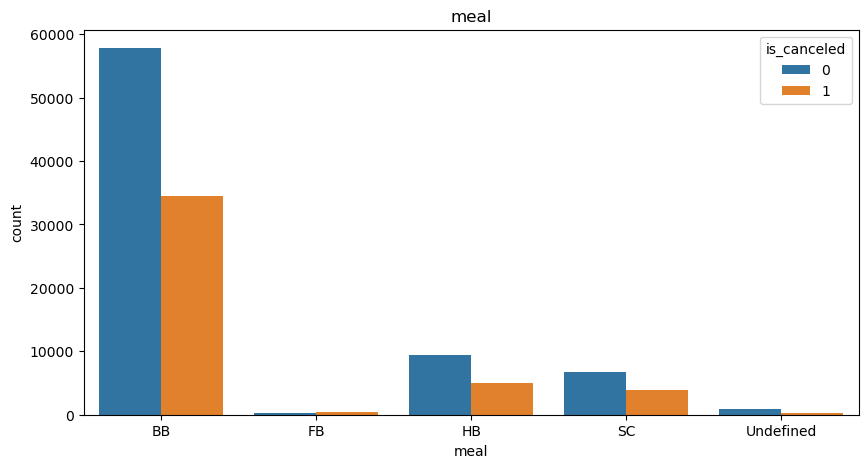

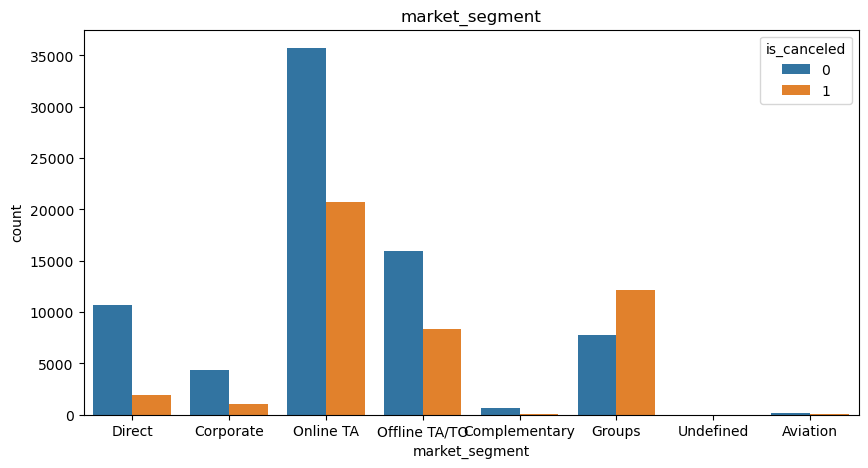

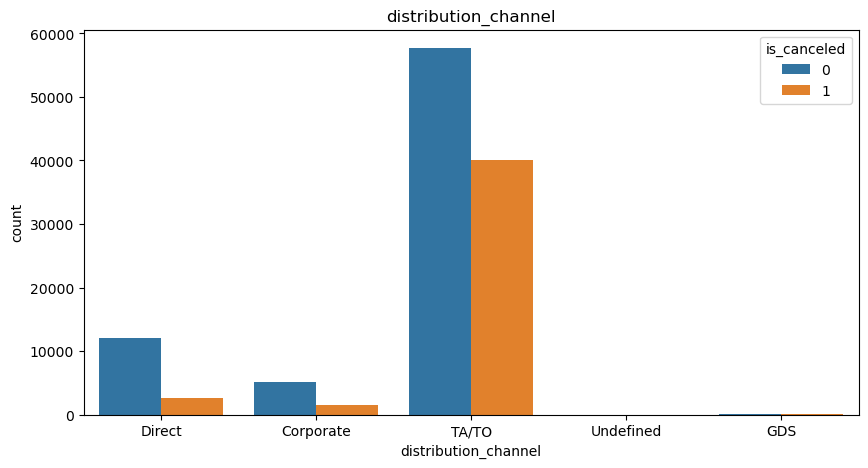

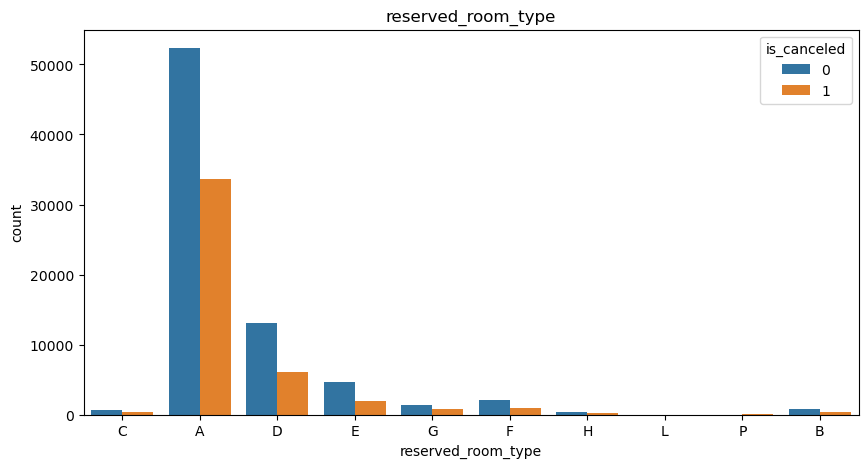

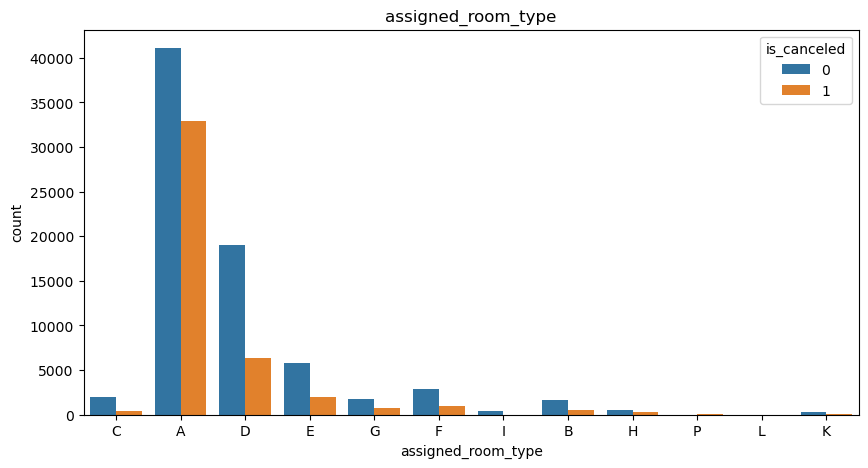

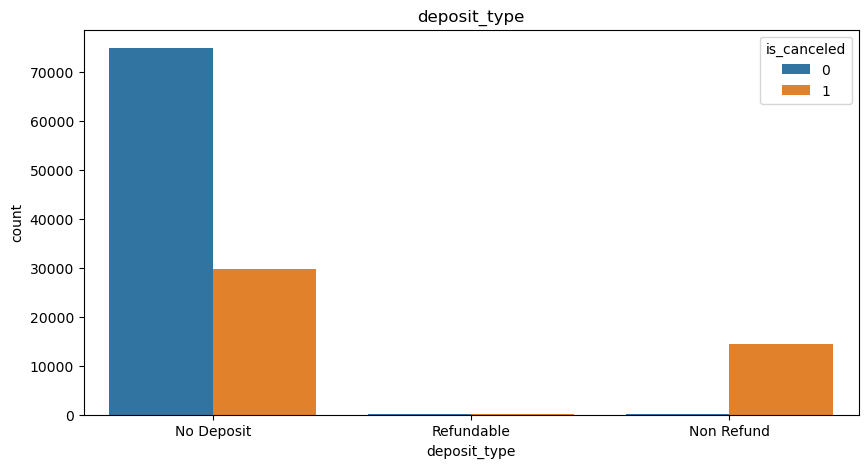

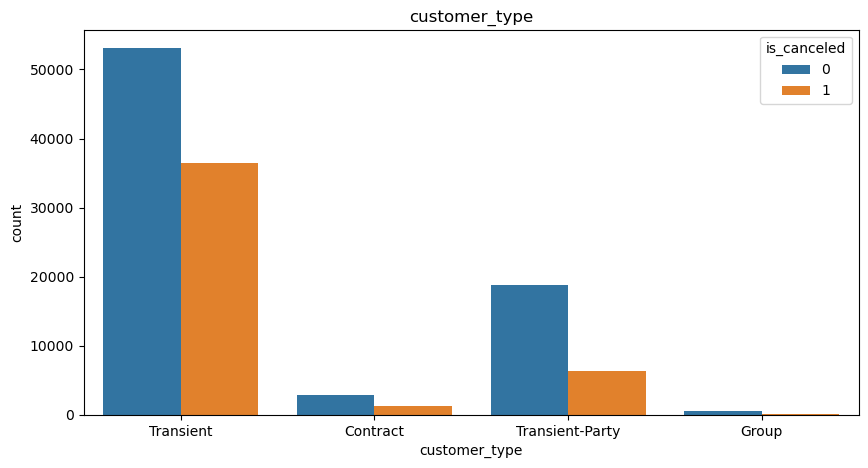

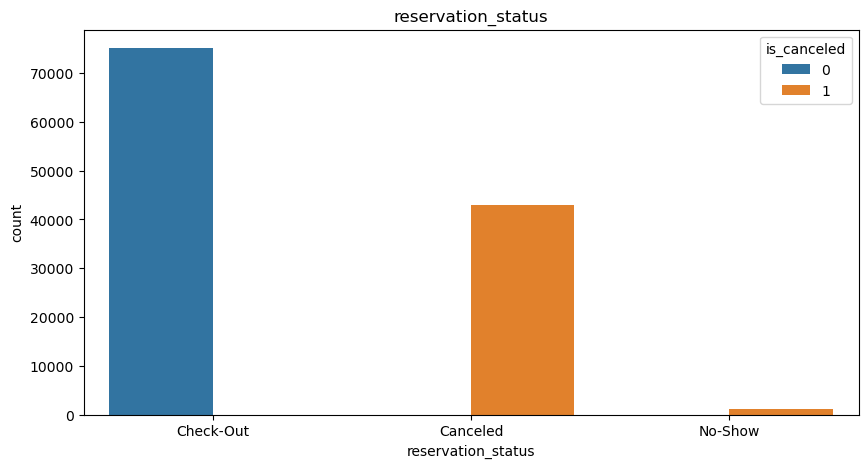

In [17]:
# visualize the distribution of categorical features and their relationship with the cancellation status (seperate by cancellation status)
cat_feature=[feature for feature in df.columns if df[feature].dtypes=='O']
for feature in cat_feature:
     if feature not in ['reservation_status_date', 'country']:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=df[feature].astype(str), hue=df['is_canceled'].astype(str))
        plt.title(feature)
        plt.show()

<Axes: xlabel='country', ylabel='count'>

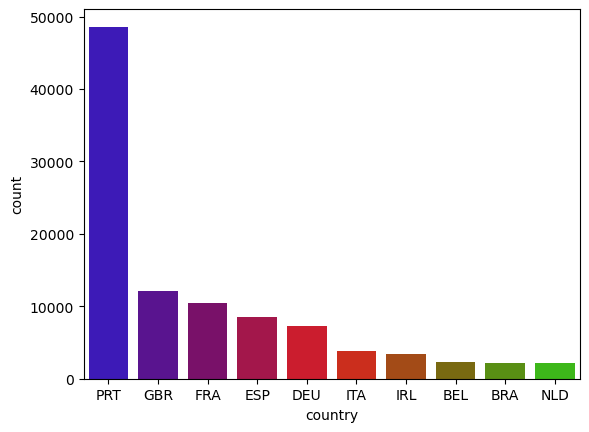

In [18]:
# Create a count plot for the top 10 most frequent countries
sns.countplot(x='country',data=df, order=pd.value_counts(df['country']).iloc[:10].index,palette="brg")

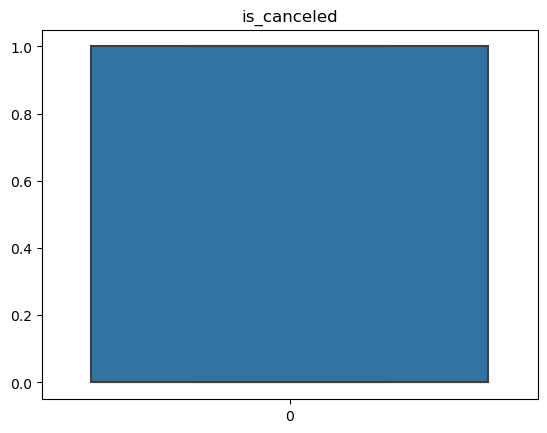

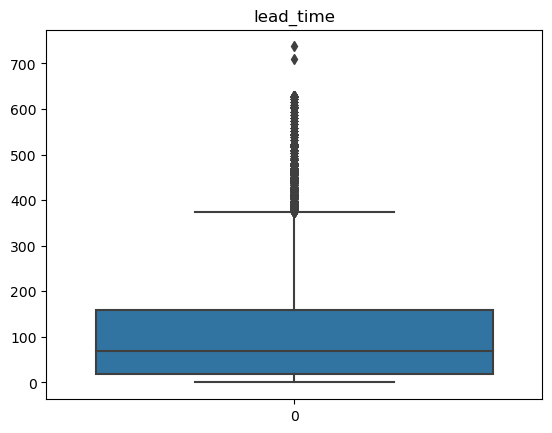

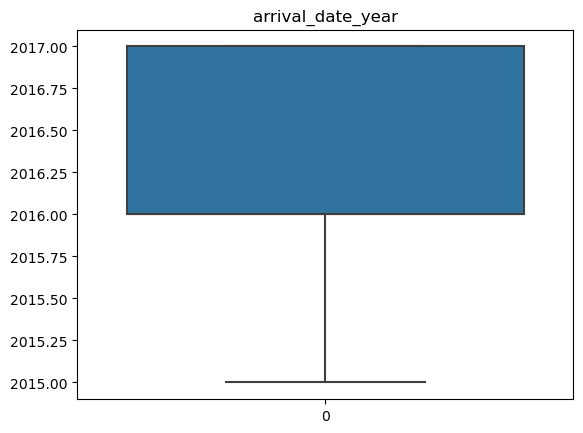

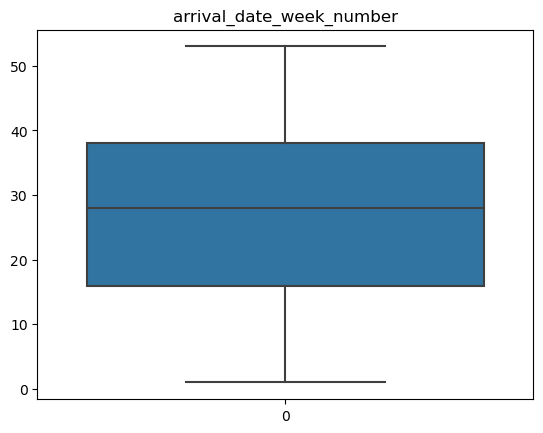

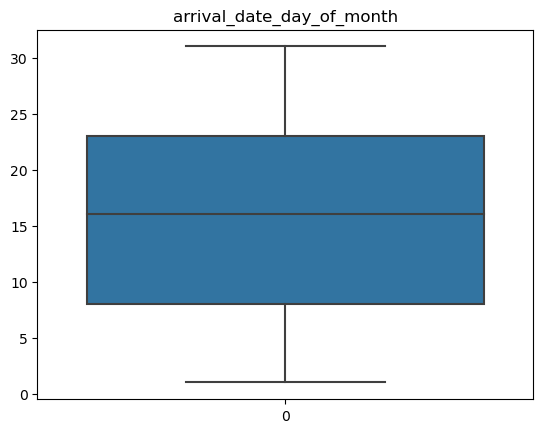

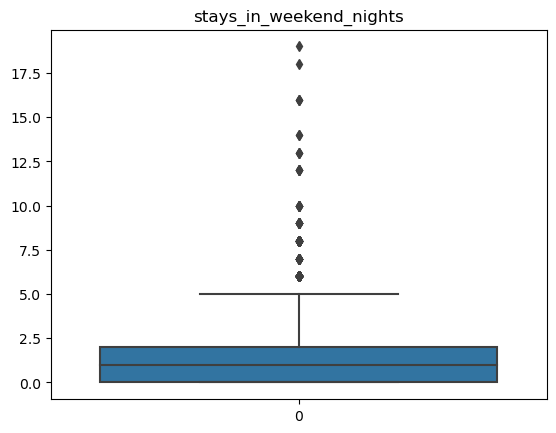

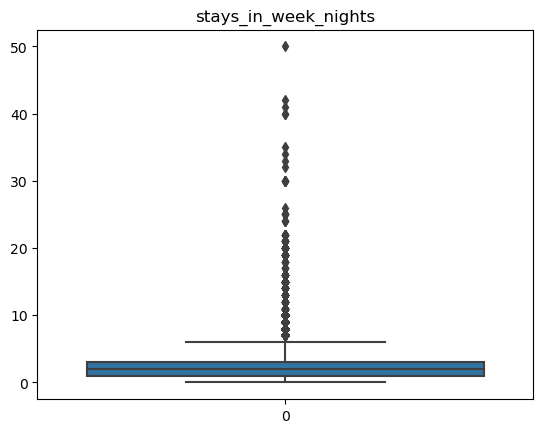

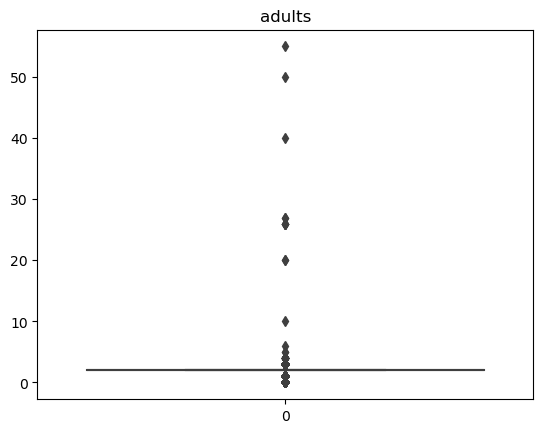

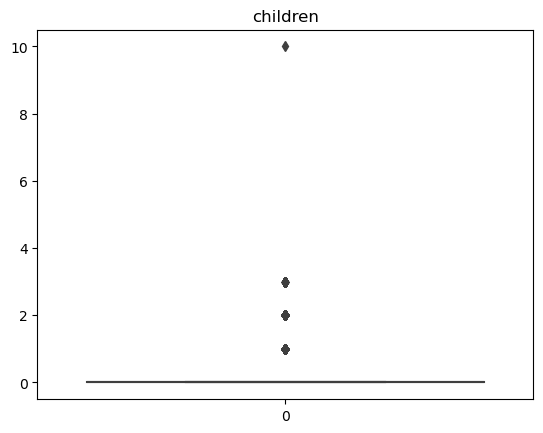

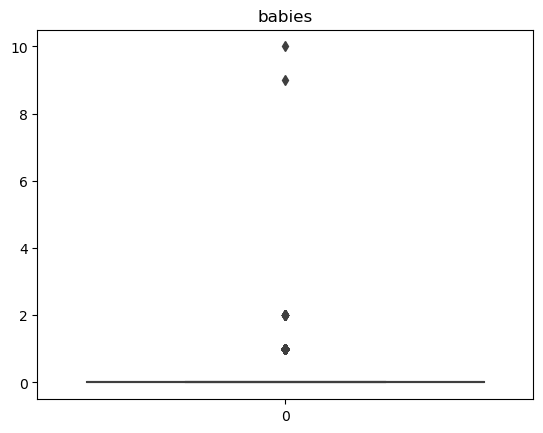

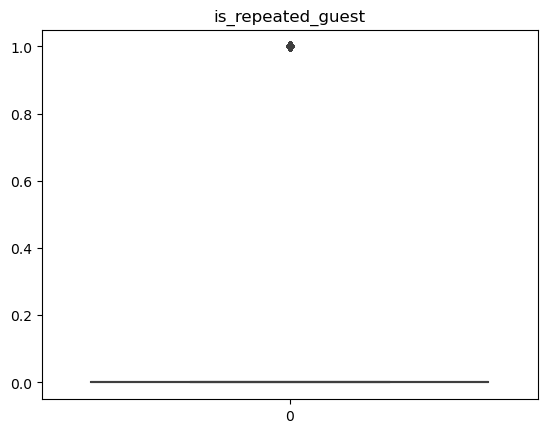

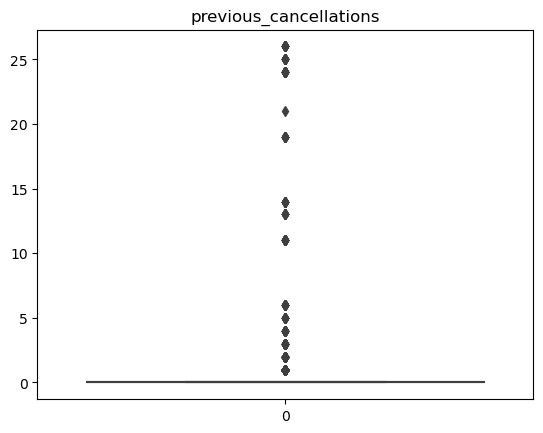

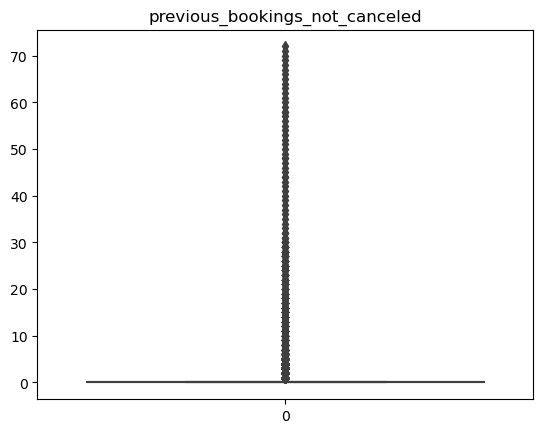

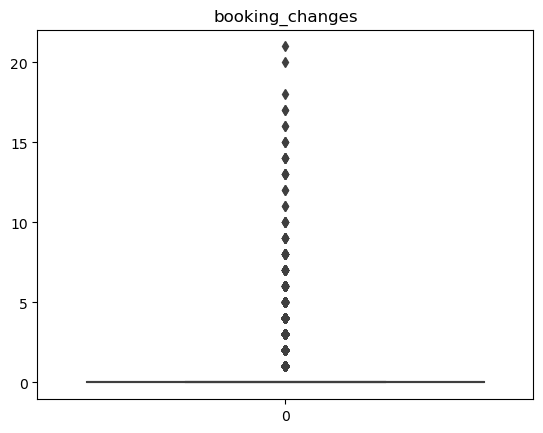

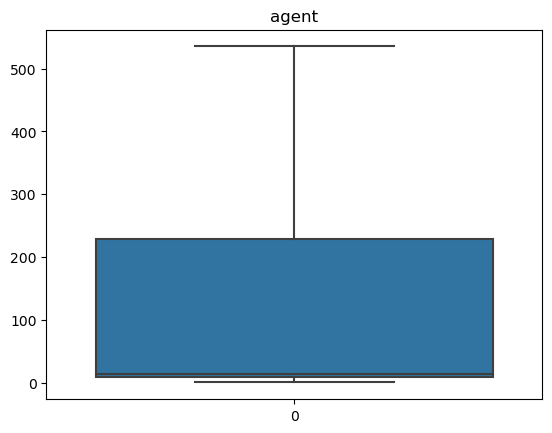

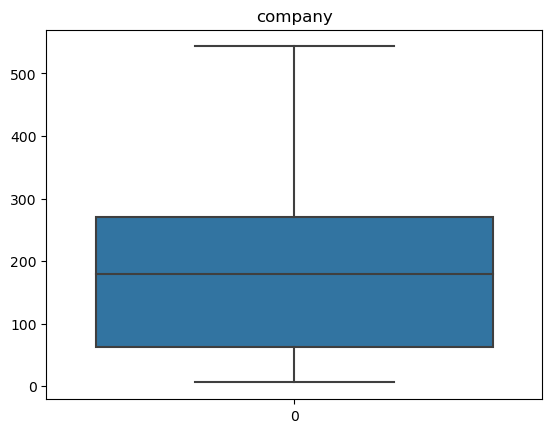

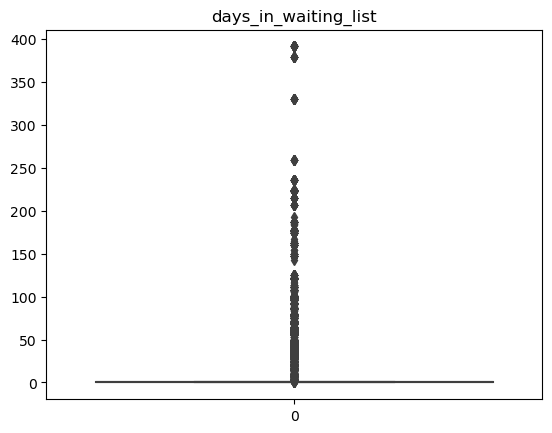

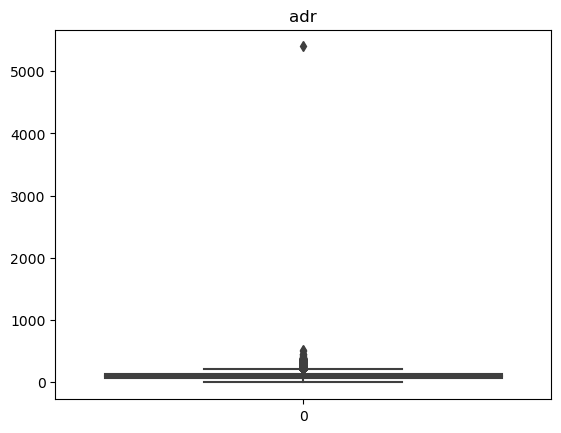

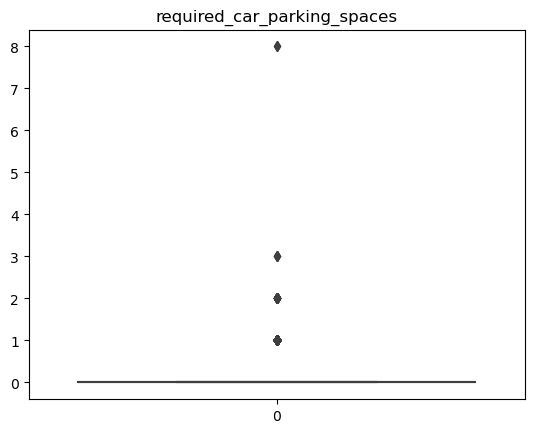

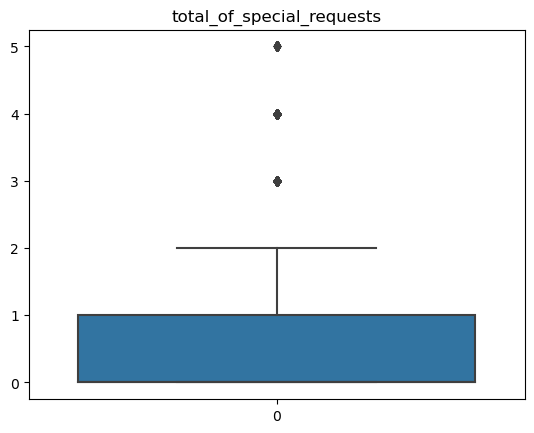

In [19]:
# Loop through each numerical feature and create a box plot
for feature in num_feature:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

Correlation

<Axes: >

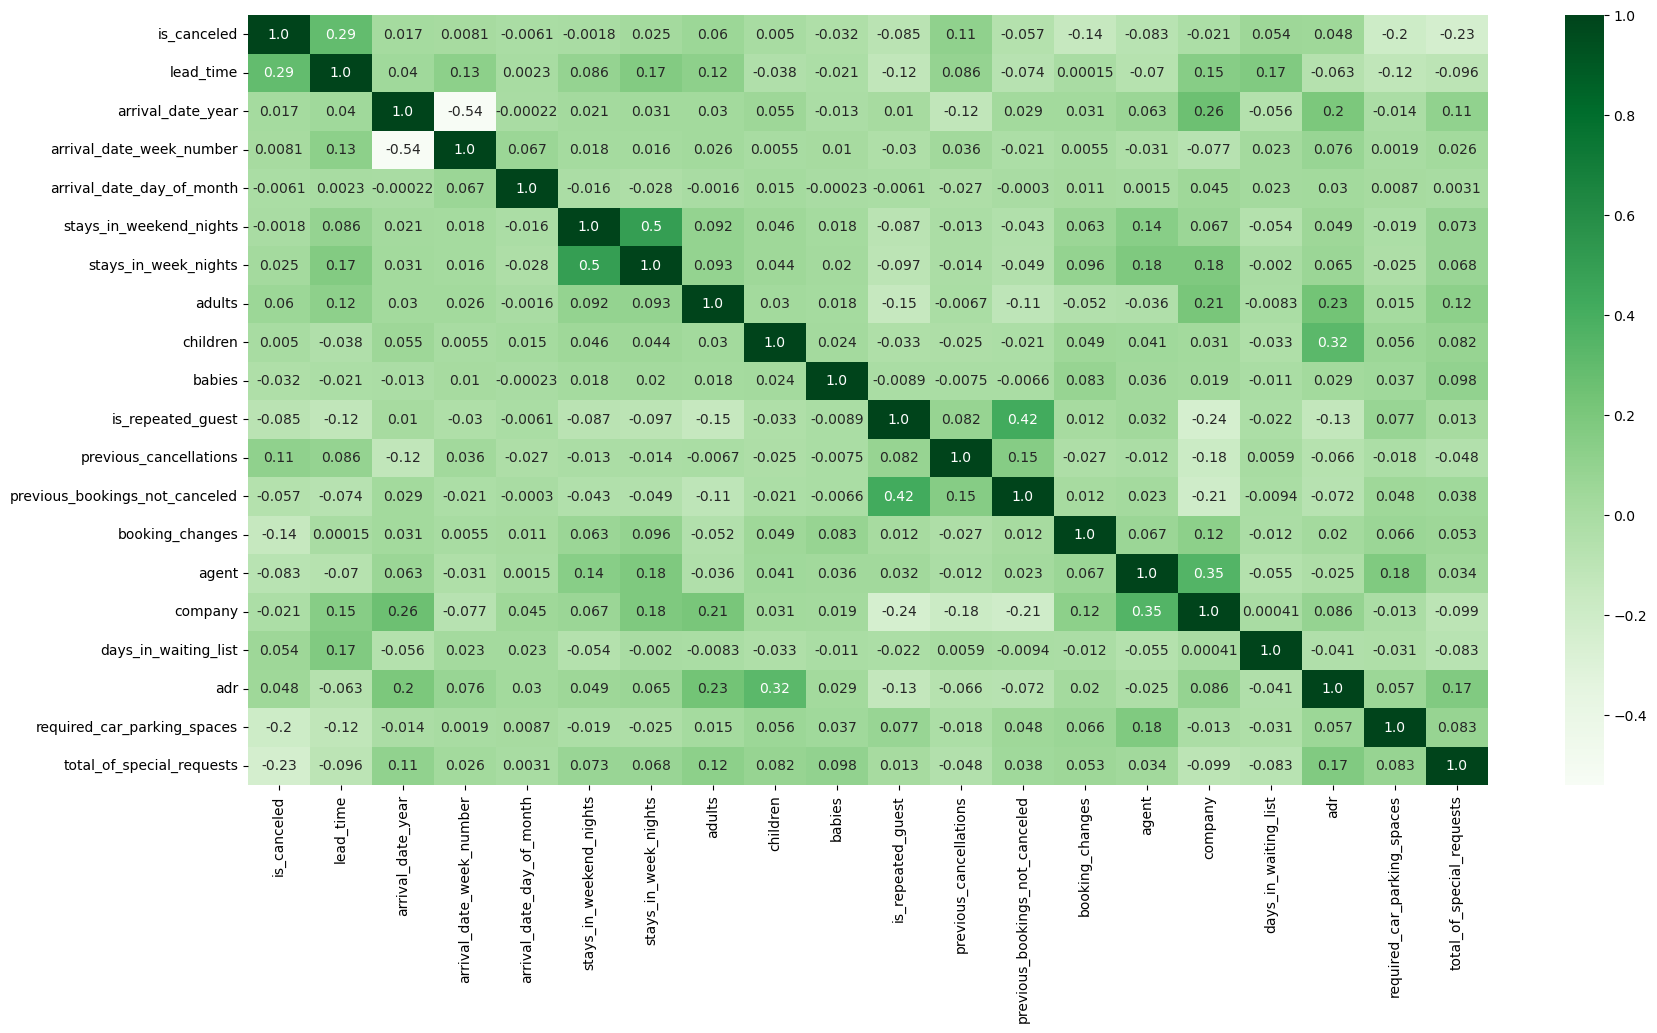

In [20]:
# visual representation of how numerical features are related to each other, helping to identify strong correlations, potential multicollinearity, and patterns in the data
cor=df[num_feature].corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='Greens',fmt='.2')

In [21]:
# create y
y=df['is_canceled']

In [22]:
# Concatenate the 'hotel' column with all columns from the third column onward
X=pd.concat([df['hotel'],df.iloc[:,2:]],axis=1)

In [23]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int64

Handling missing values

In [25]:
# drop missing columns in X
X.drop('company',axis=1,inplace=True)

# identifying which columns may require imputation or other handling techniques for missing values
nan_feature=[feature for feature in X.columns if X[feature].isnull().sum()>1]
nan_feature

# replace Nan to a new category 'Unknown' in country
X['country']=X['country'].replace(np.nan,'unknown')

# Identify columns with more than 1 missing value
nan_feature=[feature for feature in X.columns if X[feature].isnull().sum()>1]
nan_feature

# replace missing value to median
X['children']=X['children'].replace(np.nan,X['children'].median())

# replace missing value to median
X['agent']=X['agent'].replace(np.nan,X['agent'].median())

# Identify columns with more than 1 missing value
nan_feature=[feature for feature in X.columns if X[feature].isnull().sum()>1]
nan_feature

[]

In [26]:
# convert the month names in the month column to their respective numeric values
map_func={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12  }

X['arrival_date_month']=X['arrival_date_month'].map(map_func)


In [27]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,342,2015,7,27,1,0,0,2,0.0,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,737,2015,7,27,1,0,0,2,0.0,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,7,2015,7,27,1,0,1,1,0.0,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,13,2015,7,27,1,0,1,1,0.0,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,14,2015,7,27,1,0,2,2,0.0,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Handling categorical feature

In [28]:
cat_feature=[feature for feature in X.columns if X[feature].dtypes=='O']
cat_feature

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [32]:
X['arrival_date_month'].head()

0    7
1    7
2    7
3    7
4    7
Name: arrival_date_month, dtype: int64

In [33]:
#dropping unnecessary columns
X.drop(['country',
 'reserved_room_type',
 'assigned_room_type',
 'reservation_status',
 'reservation_status_date'],axis=1,inplace=True)

# drop varibales children and babies
X.drop(['children','babies'],axis=1,inplace=True)
X.shape



(119390, 23)

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline


# Assuming 'X' is your DataFrame and 'y' is your target variable
categorical_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']
numerical_cols = [col for col in X.columns if col not in categorical_cols ]

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numerical_cols),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
        
    ]
)



In [35]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,342,2015,7,27,1,0,0,2,BB,...,0,0,3,No Deposit,14.0,0,Transient,0.0,0,0
1,Resort Hotel,737,2015,7,27,1,0,0,2,BB,...,0,0,4,No Deposit,14.0,0,Transient,0.0,0,0
2,Resort Hotel,7,2015,7,27,1,0,1,1,BB,...,0,0,0,No Deposit,14.0,0,Transient,75.0,0,0
3,Resort Hotel,13,2015,7,27,1,0,1,1,BB,...,0,0,0,No Deposit,304.0,0,Transient,75.0,0,0
4,Resort Hotel,14,2015,7,27,1,0,2,2,BB,...,0,0,0,No Deposit,240.0,0,Transient,98.0,0,1


In [36]:
# split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
X_train

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
9710,Resort Hotel,122,2016,12,53,27,0,4,2,BB,...,0,0,3,No Deposit,240.0,0,Transient,74.75,0,2
40307,City Hotel,20,2015,7,30,22,0,2,2,BB,...,0,0,0,No Deposit,1.0,0,Transient-Party,62.00,0,0
110051,City Hotel,87,2017,4,16,16,2,3,3,BB,...,0,0,0,No Deposit,9.0,0,Transient,171.00,0,0
22999,Resort Hotel,0,2017,2,5,2,0,1,1,BB,...,0,1,0,No Deposit,196.0,0,Transient,43.00,0,1
8344,Resort Hotel,42,2016,9,39,23,0,1,2,BB,...,0,0,0,No Deposit,240.0,0,Transient,109.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,City Hotel,2,2016,7,28,8,0,1,2,BB,...,2,4,1,No Deposit,14.0,0,Transient,77.00,1,0
110268,City Hotel,91,2017,4,16,20,2,3,2,BB,...,0,0,0,No Deposit,9.0,0,Transient,135.00,0,0
103694,City Hotel,74,2016,12,53,27,0,3,3,BB,...,0,0,0,No Deposit,22.0,0,Transient,92.65,0,0
860,Resort Hotel,130,2015,8,31,1,2,5,2,BB,...,0,0,0,No Deposit,240.0,0,Transient,120.60,0,2


Modeling

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Define models
logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
rf_model=RandomForestClassifier()

# Create pipelines
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logreg)])
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn)])
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_model)])

# Cross-validation to determine which model works best
logreg_scores = cross_val_score(logreg_pipeline, X_train, y_train, scoring='f1', cv=5)
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, scoring='f1', cv=5)
nb_scores = cross_val_score(rf_pipeline, X_train, y_train, scoring='f1', cv=5)

print(f'Logistic Regression Mean F1 Score: {np.mean(logreg_scores)}')
print(f'K-Nearest Neighbors Mean F1 Score: {np.mean(knn_scores)}')
print(f'Random Forest Classifier Mean F1 Score: {np.mean(nb_scores)}')

# Select the best model based on highest F1 score
best_model_pipeline = None
best_model_name = ''
best_f1_score = 0

if np.mean(logreg_scores) > best_f1_score:
    best_f1_score = np.mean(logreg_scores)
    best_model_pipeline = logreg_pipeline
    best_model_name = 'Logistic Regression'

if np.mean(knn_scores) > best_f1_score:
    best_f1_score = np.mean(knn_scores)
    best_model_pipeline = knn_pipeline
    best_model_name = 'K-Nearest Neighbors'

if np.mean(nb_scores) > best_f1_score:
    best_f1_score = np.mean(nb_scores)
    best_model_pipeline = rf_pipeline
    best_model_name = 'Random Forest Classifier'

print(f'Best Model: {best_model_name} with F1 Score: {best_f1_score}')

c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Logistic Regression Mean F1 Score: 0.6975560288987699
K-Nearest Neighbors Mean F1 Score: 0.7405655342557136
Random Forest Classifier Mean F1 Score: 0.8046663268658134
Best Model: Random Forest Classifier with F1 Score: 0.8046663268658134


Random Forest Classifier

In [288]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

estimator=rf_pipeline.fit(X_train,y_train)
predict_rf=rf_pipeline.predict(X_test)


In [289]:
prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

In [290]:
accuracy = accuracy_score(y_test, predict_rf)
precision = precision_score(y_test, predict_rf, average='weighted')
recall = recall_score(y_test, predict_rf, average='weighted')
f1 = f1_score(y_test, predict_rf, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print("RF", classification_report(y_test,predict_rf))

Accuracy: 0.8713739285814
Precision: 0.8715044425657629
Recall: 0.8713739285814
F1 Score: 0.8694207511225104
RF               precision    recall  f1-score   support

           0       0.87      0.93      0.90     22478
           1       0.87      0.77      0.82     13339

    accuracy                           0.87     35817
   macro avg       0.87      0.85      0.86     35817
weighted avg       0.87      0.87      0.87     35817



<Axes: >

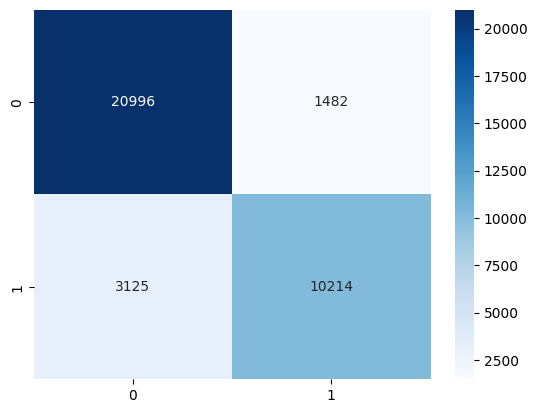

In [291]:
cm=confusion_matrix(y_test,predict_rf)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')

KNN

In [62]:
knn_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_month',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes', 'agent',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['hotel', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'deposit_type',
                                                   'customer_type'])])),
                ('classifier', KNeighborsClassifier())])

In [63]:
y_pred=knn_pipeline.predict(X_test)

In [64]:
prob_knn = knn_pipeline.predict_proba(X_test)[:, 1]

In [65]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print("KNN", classification_report(y_test,y_pred))

Accuracy: 0.8240779518105927
Precision: 0.7909707292872499
Recall: 0.7171452132843541
F1 Score: 0.7522510124641213
KNN               precision    recall  f1-score   support

           0       0.84      0.89      0.86     22478
           1       0.79      0.72      0.75     13339

    accuracy                           0.82     35817
   macro avg       0.82      0.80      0.81     35817
weighted avg       0.82      0.82      0.82     35817



In [58]:
# Define the parameter grid for KNN
param_grid = {
    'classifier__n_neighbors': [29,30,31,35,40],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}


# Perform GridSearchCV
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best F1 score
best_params = grid_search.best_params_
best_f1_score = grid_search.best_score_

print(f'Best parameters: {best_params}')
print(f'Best F1 score: {best_f1_score:.4f}')

Best parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 29, 'classifier__weights': 'distance'}
Best F1 score: 0.7800


In [60]:
knn_new = KNeighborsClassifier(n_neighbors=29, weights= 'distance', metric= 'manhattan')
knn_pipeline_new = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn_new)])
knn_scores_new = cross_val_score(knn_pipeline_new, X_train, y_train, scoring='f1', cv=5)
best_f1_score_knn = np.mean(knn_scores_new)



# Fit the best model on the training data
knn_pipeline_new.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_pipeline_new.predict(X_test)

# Calculate and print the F1 score for the test data
final_f1_score_knn = f1_score(y_test, y_pred)
print(f'Final F1 Score on Test Data: {final_f1_score_knn}')

Final F1 Score on Test Data: 0.7936748792077626


<Axes: >

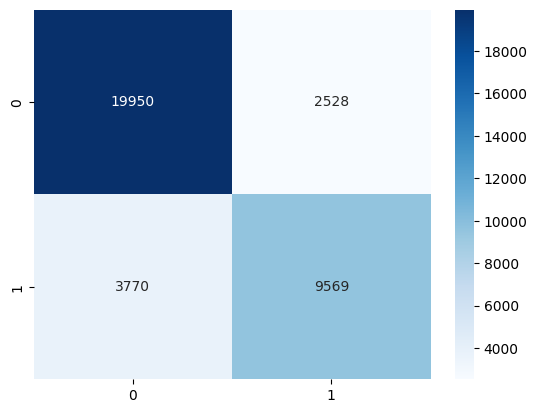

In [296]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')

Logistic Regression

In [66]:
# Fit the model to the training data
estimator = logreg_pipeline.fit(X_train, y_train)

In [67]:
# Make predictions on the test data
predict_logreg = logreg_pipeline.predict(X_test)

In [68]:
prob_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]

In [69]:
# Calculate and print the separate metrics
accuracy = accuracy_score(y_test, predict_logreg)
precision = precision_score(y_test, predict_logreg)
recall = recall_score(y_test, predict_logreg)
f1 = f1_score(y_test, predict_logreg)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print the classification report
print("LR", classification_report(y_test, predict_logreg))

Accuracy: 0.8094201077700534
Precision: 0.8452242128697127
Recall: 0.59772096858835
F1 Score: 0.7002459160372387
LR               precision    recall  f1-score   support

           0       0.80      0.94      0.86     22478
           1       0.85      0.60      0.70     13339

    accuracy                           0.81     35817
   macro avg       0.82      0.77      0.78     35817
weighted avg       0.81      0.81      0.80     35817



In [45]:
# Hyperparameter tuning for Logistic Regression
param_grid = [
    {'classifier__penalty': ['l1', 'l2'],
     'classifier__C': [0.01, 0.1, 1, 10, 100],
     'classifier__solver': ['liblinear']},

    {'classifier__penalty': ['l2'],
     'classifier__C': [0.01, 0.1, 1, 10, 100],
     'classifier__solver': ['lbfgs', 'sag']},

    {'classifier__penalty': ['elasticnet'],
     'classifier__C': [0.01, 0.1, 1, 10, 100],
     'classifier__solver': ['saga'],
     'classifier__l1_ratio': [0.5, 0.7, 0.9]},

    {'classifier__penalty': [None],
     'classifier__C': [0.01, 0.1, 1, 10, 100],
     'classifier__solver': ['lbfgs']}
]

grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

# Get the best parameters and the best F1 score
best_params_logreg = grid_search_logreg.best_params_
best_f1_score_logreg = grid_search_logreg.best_score_

print(f'Best parameters for Logistic Regression: {best_params_logreg}')
print(f'Best F1 score for Logistic Regression: {best_f1_score_logreg:.4f}')

Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__l1_ratio': 0.5, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Best F1 score for Logistic Regression: 0.6987


In [46]:
logreg_new = LogisticRegression(C=0.1,l1_ratio=0.5, penalty= 'elasticnet', solver= 'saga', max_iter=1000)
logreg_pipeline_new = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logreg_new)])
logreg_scores_new = cross_val_score(logreg_pipeline_new, X_train, y_train, scoring='f1', cv=5)
best_f1_score_log = np.mean(logreg_scores_new)



# Fit the best model on the training data
logreg_pipeline_new.fit(X_train, y_train)

# Predict on the test data
y_pred_lg = logreg_pipeline_new.predict(X_test)

# Calculate and print the F1 score for the test data
final_f1_score_log = f1_score(y_test, y_pred_lg)
print(f'Final F1 Score on Test Data: {final_f1_score_knn}')

<Axes: >

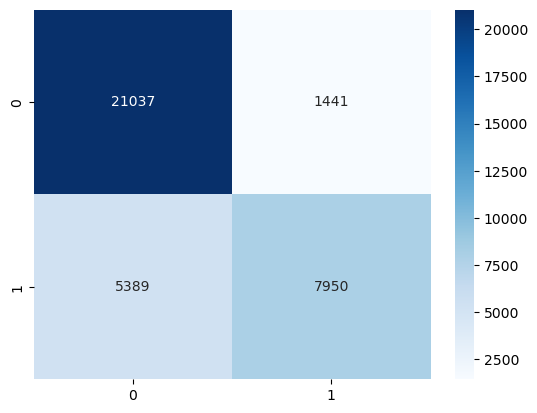

In [50]:
#hyperpramater tuning cf
cm_1=confusion_matrix(y_test,y_pred)
sns.heatmap(cm_1,annot=True,cmap='Blues',fmt='d')

<Axes: >

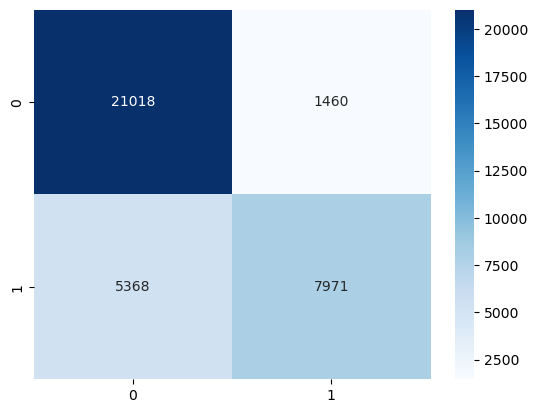

In [44]:
cm=confusion_matrix(y_test,predict_logreg)
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')

ROC curve

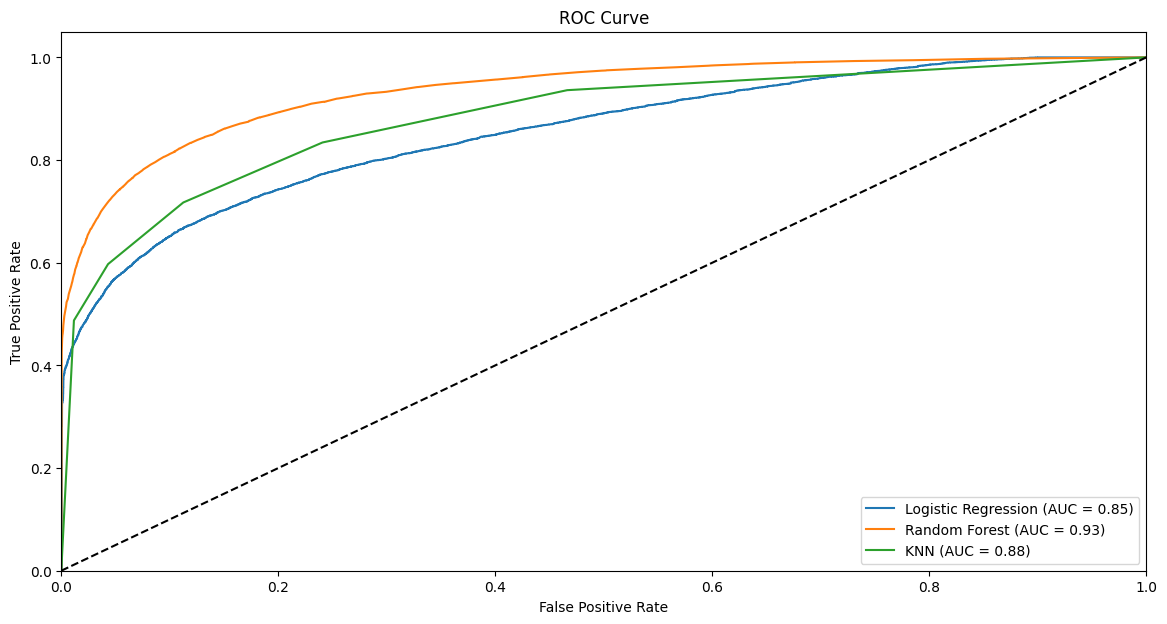

In [302]:
plt.figure(figsize=(14, 7))

# Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, prob_logreg)
roc_auc_logreg = roc_auc_score(y_test, prob_logreg)
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, prob_rf)
roc_auc_rf = roc_auc_score(y_test, prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, prob_knn)
roc_auc_knn = roc_auc_score(y_test, prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

P-R Curve

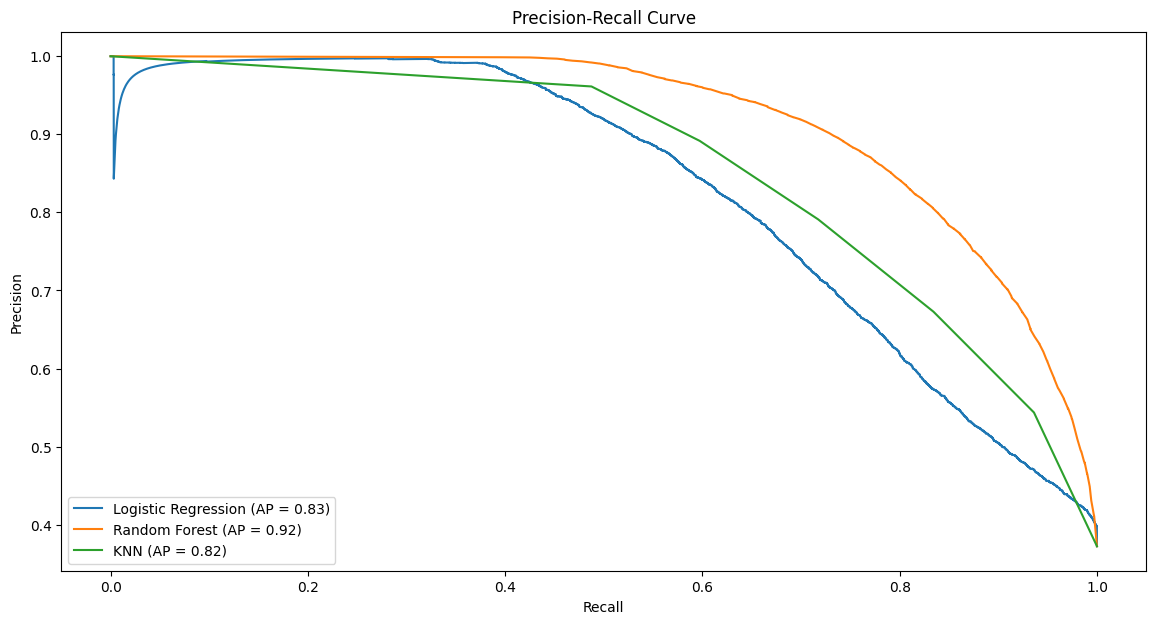

In [303]:
plt.figure(figsize=(14, 7))

# Logistic Regression
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, prob_logreg)
average_precision_logreg = average_precision_score(y_test, prob_logreg)
plt.plot(recall_logreg, precision_logreg, label=f'Logistic Regression (AP = {average_precision_logreg:.2f})')

# Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, prob_rf)
average_precision_rf = average_precision_score(y_test, prob_rf)
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {average_precision_rf:.2f})')

# KNN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, prob_knn)
average_precision_knn = average_precision_score(y_test, prob_knn)
plt.plot(recall_knn, precision_knn, label=f'KNN (AP = {average_precision_knn:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()